# Publishing rate raw data visualizations

[The Research Productivity of New PhDs in Economics: The Surprisingly High Non-success of the Successful](https://www.aeaweb.org/articles?id=10.1257/jep.28.3.205)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import seaborn as sns

from mayavi import mlab
from mayavi.api import Engine
%gui qt

sns.set_palette("Dark2")

In [5]:
quantiled_by_year_rank = pd.read_csv("raw_data/rank_year_agg.csv")
raw_mean_aer_quantiles = pd.read_csv("raw_data/rank_agg.csv")
raw_data = pd.read_excel("raw_data/data/Conley_Onder_JEPdata.xlsx")
mock_data = pd.read_csv("fake_data/mock_data.csv")
mock_data_quantiles = pd.read_csv("fake_data/mock_data_base_quantiles.csv")
mock_data_quantiles_sh = pd.read_csv("fake_data/mock_data_school_help_quantiles.csv")

## Visualize fake data

Add some graphs demonstrating what we might expect in fabricated scenarios, like schools adding some additional value.

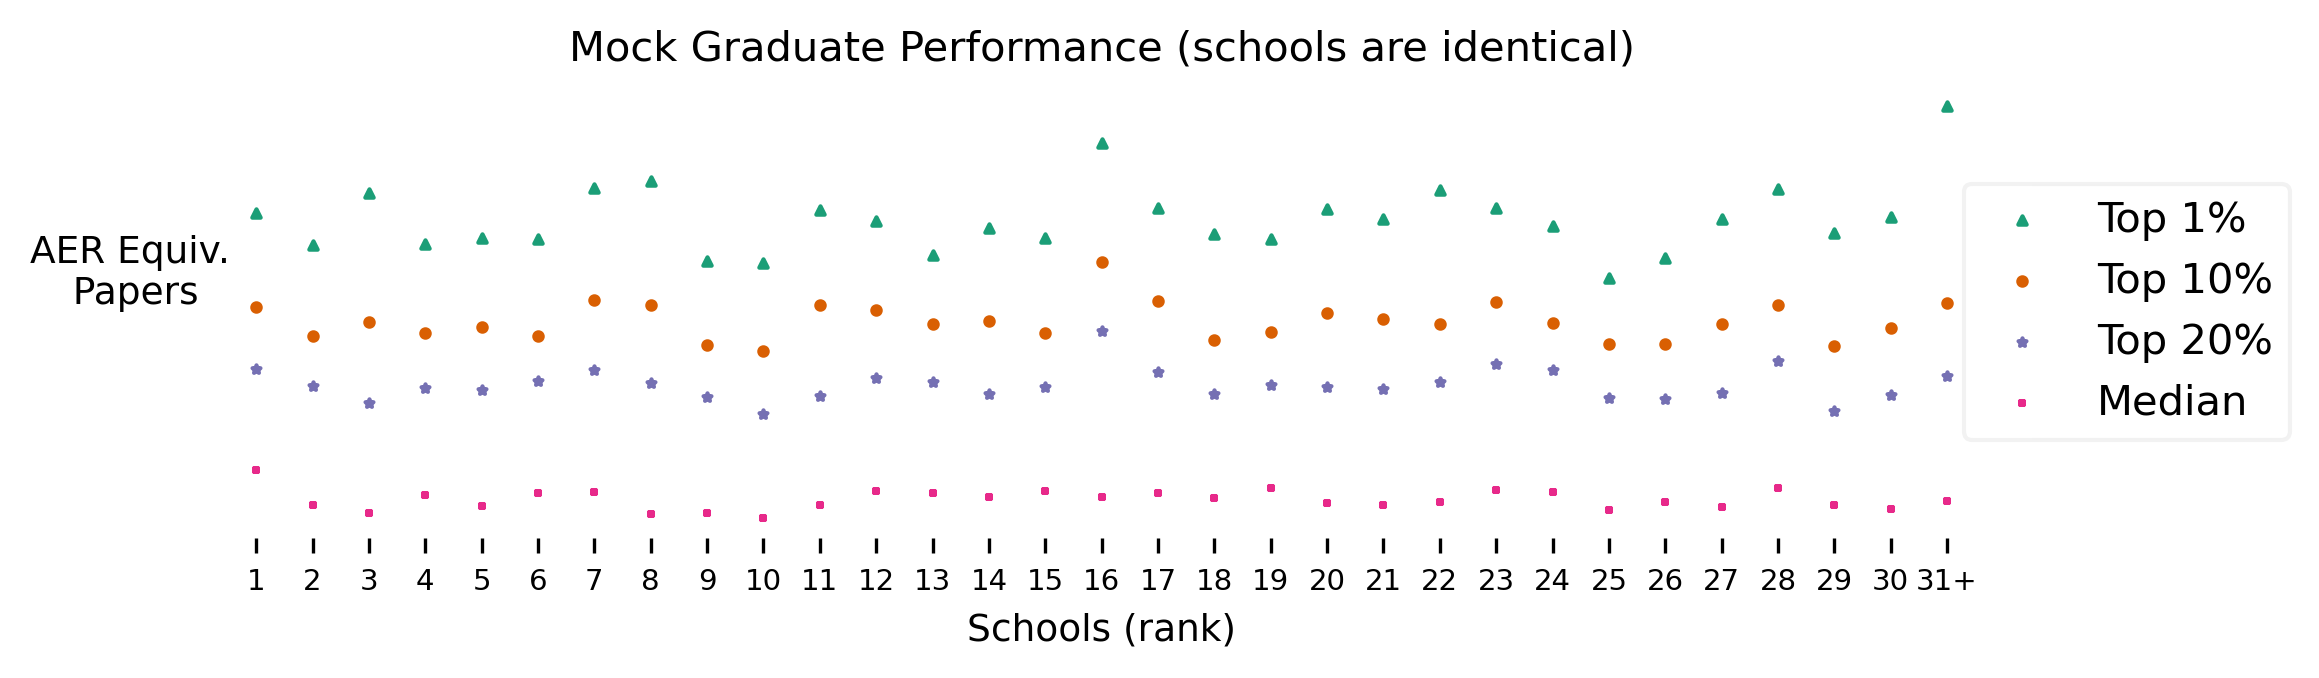

In [66]:
fig_mock_base, ax = plt.subplots(figsize=(8,2))
fig_mock_base.set_dpi(300)

mean_aer_quantiles = mock_data_quantiles

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', alpha=1, label="Top 1%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', alpha=1, label="Top 10%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*',  alpha=1, label="Top 20%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+',  alpha=1, label="Median", s=4);
ax.set_title("Mock Graduate Performance (schools are identical)", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("Schools (rank)", fontsize=9)
ax.set_ylabel("AER Equiv.\n Papers", rotation=0, fontsize=9, labelpad=10)

ax.set_yticks([])


ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5),  ncol=1, framealpha=0.25);

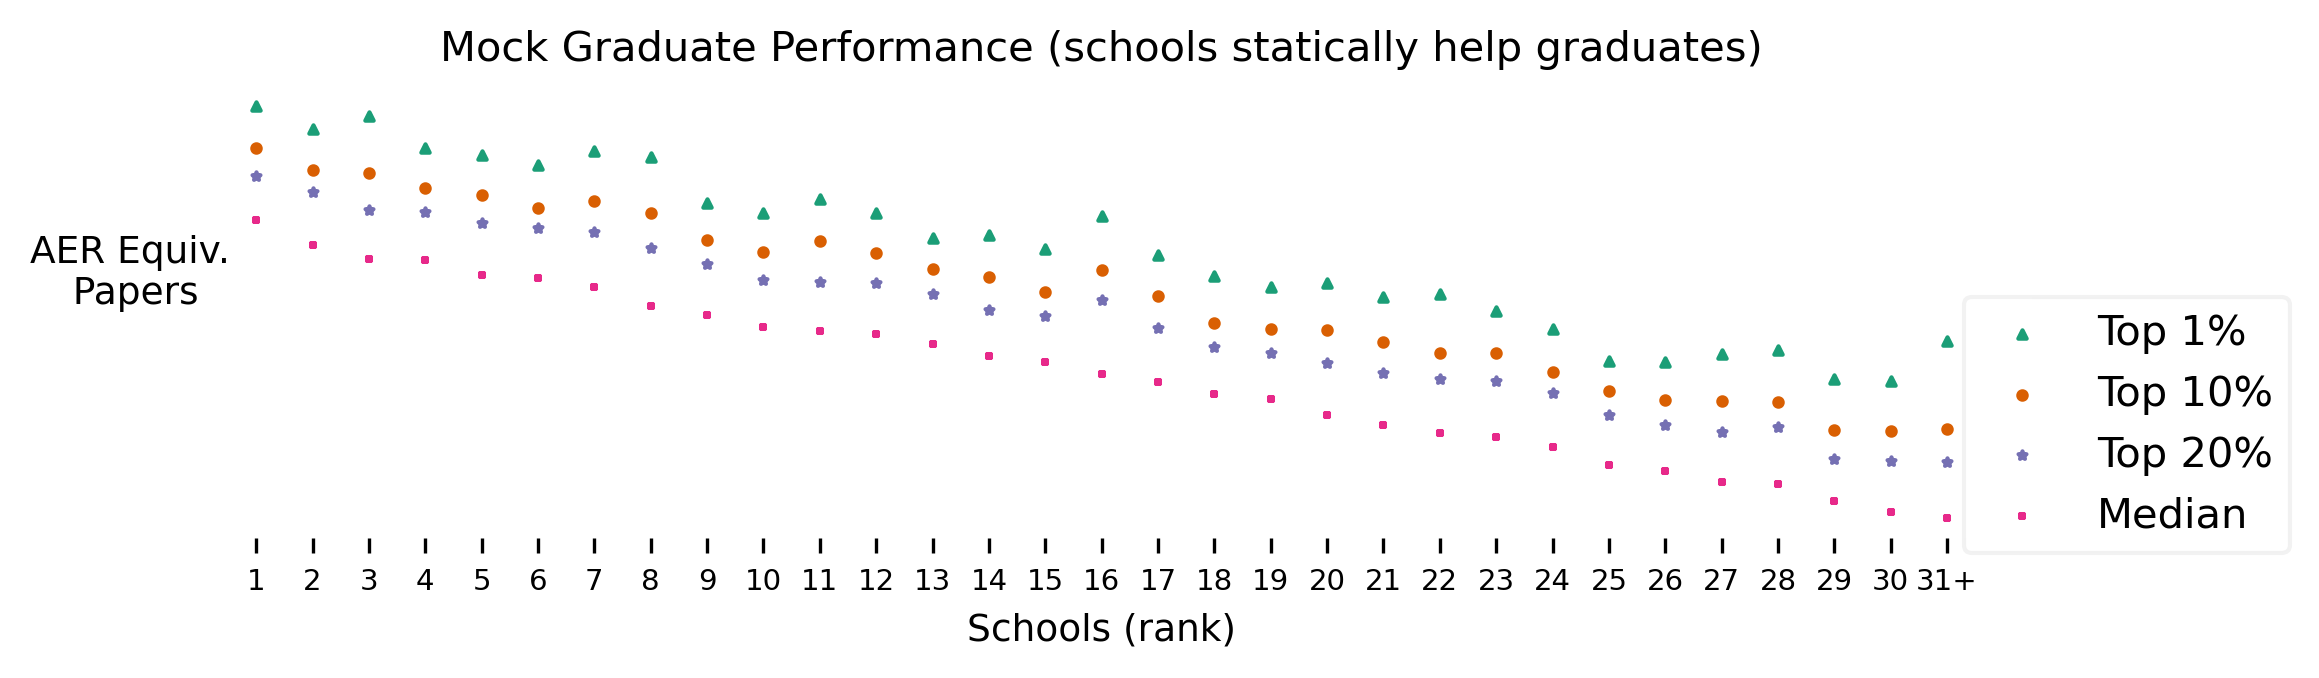

In [64]:
sns.set_palette("Dark2")

fig_mock_sh, ax = plt.subplots(figsize=(8,2))
fig_mock_sh.set_dpi(300)

mean_aer_quantiles = mock_data_quantiles_sh

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', alpha=1, label="Top 1%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', alpha=1, label="Top 10%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*',  alpha=1, label="Top 20%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+',  alpha=1, label="Median", s=4);
ax.set_title("Mock Graduate Performance (schools statically help graduates)", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("Schools (rank)", fontsize=9)
ax.set_ylabel("AER Equiv.\n Papers", rotation=0, fontsize=9, labelpad=10)
ax.set_yticks([])

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.legend(loc='right', bbox_to_anchor=(1.15, 0.25),  ncol=1, framealpha=0.25);

In [53]:
fig_mock_base.savefig("visualizations/mock_data_base.png", bbox_inches = 'tight')
fig_mock_sh.savefig("visualizations/mock_data_school_help.png", bbox_inches = 'tight')

## Visualize

Let's visualize the data first to get an idea of what we're modelling.

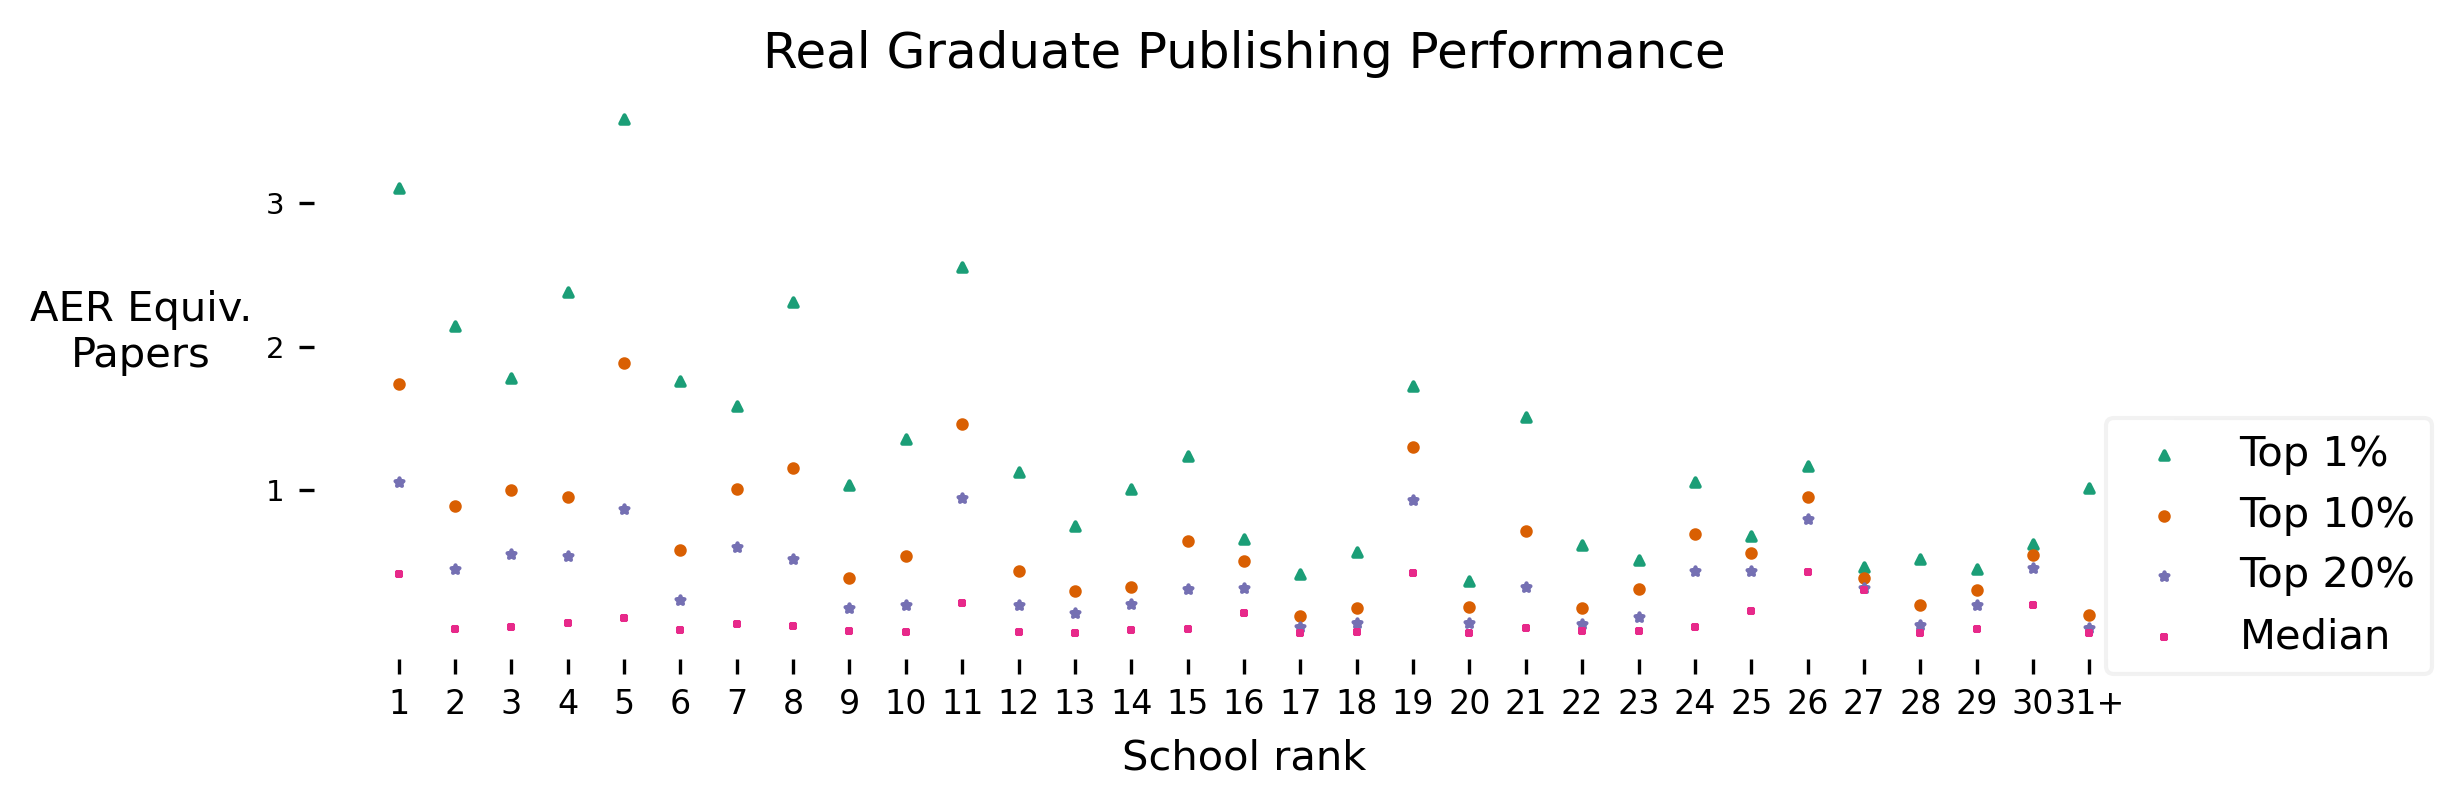

In [62]:
fig, ax = plt.subplots(figsize=(8,2.5))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

mean_aer_quantiles = raw_mean_aer_quantiles

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', alpha=1, label="Top 1%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', alpha=1, label="Top 10%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*',  alpha=1, label="Top 20%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+',  alpha=1, label="Median", s=4);
ax.set_title("Real Graduate Publishing Performance", fontsize=12)

ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=8)
ax.set_xlabel("School rank", fontsize=10)
ax.set_ylabel("AER Equiv.\nPapers", fontsize=10, rotation=0, labelpad=30)
ax.set_yticks([1,2,3])
ax.set_yticklabels(["1", "2", "3"], fontsize=7)


ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.legend(loc='right', bbox_to_anchor=(1.15, 0.2),  ncol=1, framealpha=0.25);

In [86]:
fig.savefig("visualizations/raw_data_quantiles.png", bbox_inches = 'tight')

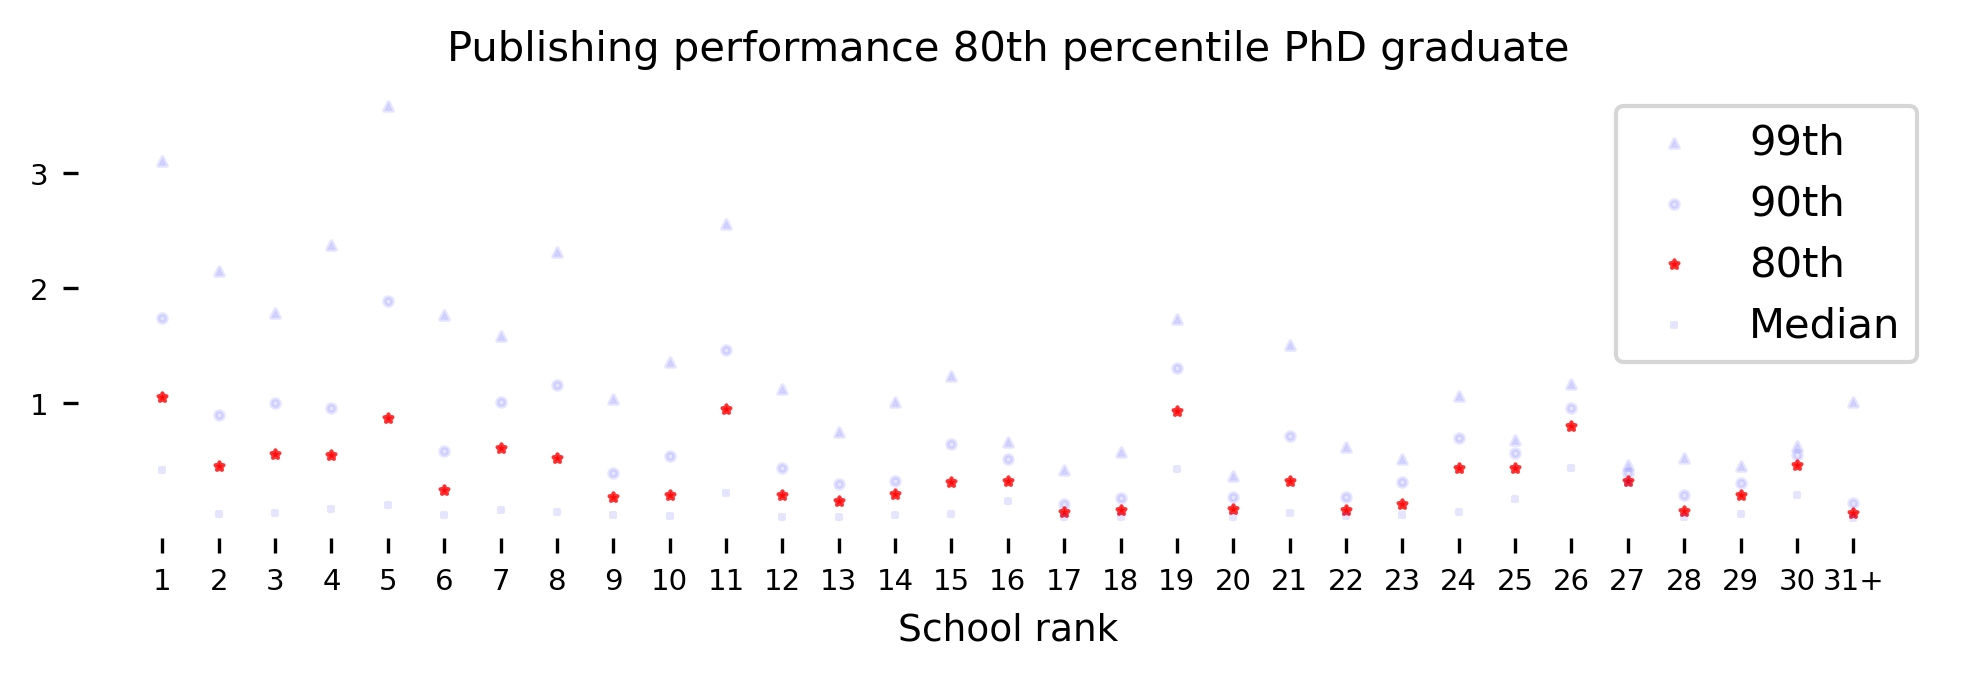

In [4]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="blue", alpha=0.1, label="99th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.1, label="90th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="red", alpha=0.8, label="80th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="blue", alpha=0.1, label="Median", s=4);
ax.set_title("Publishing performance 80th percentile PhD graduate", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank", fontsize=9)
ax.set_yticks([1,2,3])
ax.set_yticklabels(["1", "2", "3"], fontsize=7)

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)


ax.legend();

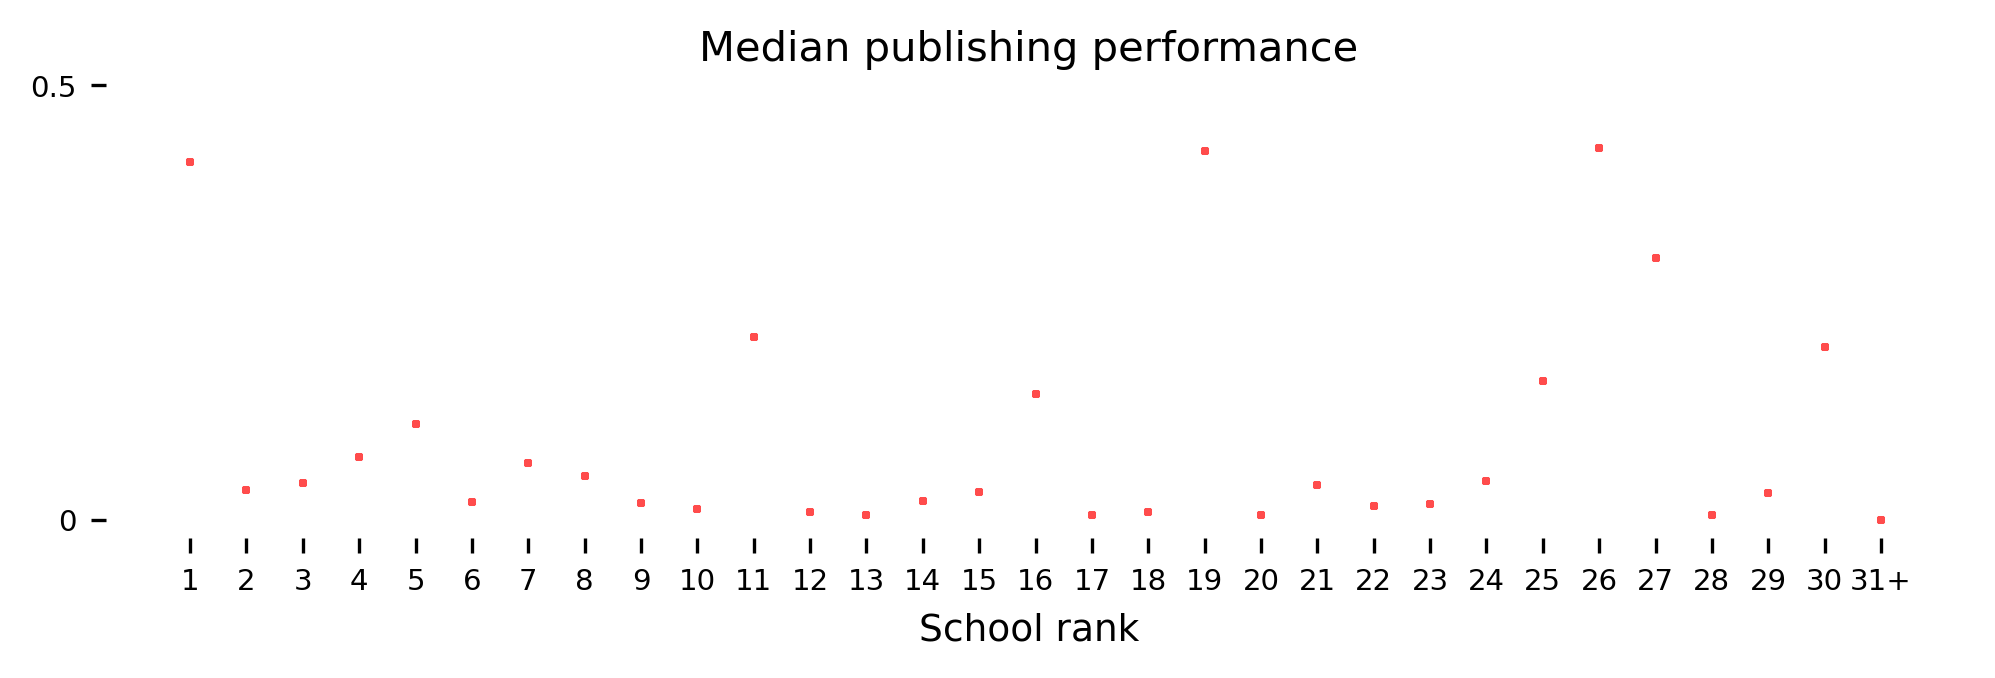

In [5]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="red", alpha=0.7, label="Median", s=4);
ax.set_title("Median publishing performance ", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank ", fontsize=9)
ax.set_yticks([0,.5])
ax.set_yticklabels(["0", "0.5"], fontsize=7)

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# 3D Plotting

First we will look at the raw data in 3d.

In [68]:
xwidth = 210
xbar_width = xwidth / 30 - 0.2

ylength = 90
ybar_length = 10.0

num_buckets=10

x,y = np.mgrid[1:xwidth:30j, 0:ylength:10j]
z = np.zeros((30, num_buckets))
for rank in range(1,31):
    hist, bins = np.histogram(mock_data[raw_data.Rank == rank].AERPub.values,
                              bins=num_buckets,
                              range=(0, 2.5))
    z[rank-1,:] = hist

/home/mfritze/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [85]:
mlab.clf(raw_fig)
raw_fig = mlab.figure("Raw data", bgcolor=(1.0, 1.0, 1.0), fgcolor=(.28, .28, .28))
bar = mlab.barchart(x,y,z, figure = raw_fig);

# Change bar heights
bar.module_manager.scalar_lut_manager.lut_mode = "YlGn"
bar.glyph.glyph_source.glyph_source.x_length = xbar_width
bar.glyph.glyph_source.glyph_source.y_length = ybar_length

colorbar = mlab.colorbar(orientation="vertical", nb_labels=5, label_fmt="%.0f")

colorbar.scalar_bar_representation.position = np.array([0.94,0.2])
colorbar.scalar_bar_representation.position2 = np.array([0.05,0.56])

# Plot text
title = mlab.text(.1, .85, "Publishing Rates for Econ. PhDs", figure=raw_fig, name="Title text")
xlabel = mlab.text(0.52, 0.015, "Schools (rank)", figure=raw_fig, name="xlabel")
ylabel = mlab.text(0.06, 0, "AER Equiv. Papers", figure=raw_fig, name="ylabel")
z_label = mlab.text(0.005,0.35, "Graduates", figure=raw_fig, name="zlabel")

x_low_lim = mlab.text(0.245, 0., "30", figure=raw_fig, name="x lower")
x_twenty = mlab.text(0.485, 0.075, "20", figure=raw_fig, name="x 20")
x_ten = mlab.text(0.68, 0.13, "10", figure=raw_fig, name="x 10")
x_up_lim = mlab.text(0.845, 0.18, "1", figure=raw_fig,name="x upper")

y_low_lim = mlab.text(0.11, 0.16, "0", figure=raw_fig, name="y lower")
y_up_lim = mlab.text(0.19, 0.019, "2.5", figure=raw_fig,name="y upper")

xlabel.property.orientation = 13
x_low_lim.property.orientation = 13
x_twenty.property.orientation = 13
x_ten.property.orientation = 13
x_up_lim.property.orientation = 13
ylabel.property.orientation = 311
y_low_lim.property.orientation = 311
y_up_lim.property.orientation = 311

title.width=0.8
z_label.width = 0.15
xlabel.width=0.2
ylabel.width=0.14
x_low_lim.width=0.03
x_twenty.width = 0.03
x_ten.width = 0.03
x_up_lim.width=0.015
y_low_lim.width=0.02
y_up_lim.width=0.04

# Position the camera
mlab.view(azimuth=60, elevation=80, distance=450, figure=raw_fig);

In [70]:
mlab.savefig("visualizations/raw_data.png", magnification=1.0, figure=raw_fig)

### Normalized

Now we will take that same data and normalize it to 100 graduates per school so you get a better feel for the ratio of successful publishers.

In [ ]:
xwidth = 210
xbar_width = xwidth / 30 - 0.2

ylength = 90
ybar_length = 10.0

xn,yn = np.mgrid[1:xwidth:30j, 0:ylength:10j]
zn = np.zeros((30, num_buckets))
for rank in range(1,31):
    hist, bins = np.histogram(mock_data[raw_data.Rank == rank].AERPub.values, bins=num_buckets, range=(0, 2.5))
    hundreds = np.sum(hist) / 100 # Normalizing factor to get 100 total students
    normed = hist / hundreds
    zn[rank-1,:] = normed

In [74]:
mock_fig = mlab.figure("Mock", bgcolor=(.44, .44, .44), fgcolor=(1.0, 1.0, 1.0))
mlab.clf(mock_fig)
bar = mlab.barchart(x,y,z, figure = mock_fig);

# Change bar heights
bar.module_manager.scalar_lut_manager.lut_mode = "YlGnBu"
bar.glyph.glyph_source.glyph_source.x_length = xbar_width
bar.glyph.glyph_source.glyph_source.y_length = ybar_length

colorbar = mlab.colorbar(orientation="vertical", nb_labels=5, label_fmt="%.0f")

# Position 1 is the placement. np.array(x,y) in coords [0,1]
# Position 2 is the height and width(width, height) in coords [0,1]
colorbar.scalar_bar_representation.position = np.array([0.8,0.2])
colorbar.scalar_bar_representation.position2 = np.array([0.05,0.55])

# Plot text
title = mlab.text(.1, .85, "Students choosing schools at random", figure=mock_fig, name="Title text")
title.width=0.8
# Could also set property.justification, property.font_family

xlabel = mlab.text(0.52, 0.025, "Schools by rank", figure=mock_fig, name="xlabel")
ylabel = mlab.text(0.08, 0, "AER Equiv. Papers", figure=mock_fig, name="ylabel")
z_label = mlab.text(0.01,0.45, "Graduates", figure=mock_fig, name="zlabel")

x_low_lim = mlab.text(0.4, 0.015, "30", figure=mock_fig, name="x lower")
x_up_lim = mlab.text(0.88, 0.1, "1", figure=mock_fig,name="x upper")

y_low_lim = mlab.text(0.15, 0.14, "0", figure=mock_fig, name="y lower")
y_up_lim = mlab.text(0.25, 0.07, "1.5", figure=mock_fig,name="y upper")

xlabel.property.orientation = 8
ylabel.property.orientation = 334
y_low_lim.property.orientation = 334
y_up_lim.property.orientation = 334

z_label.width = 0.15
xlabel.width=0.3
ylabel.width=0.25
x_low_lim.width=0.03
x_up_lim.width=0.015
y_low_lim.width=0.02
y_up_lim.width=0.04

# for xi in range(0,10,1):
#     for yi in range(0,10,1):
#         text = str(xi) + "," + str(yi)
#         mlab.text(xi/10,yi/10,text, figure = mock_fig, width=0.025,  opacity=0.7)

# Position the camera
mlab.view(azimuth=60, elevation=90, distance=300, figure=mock_fig);